# Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
* a. Import the necessary packages
* b. Load the training and testing data 
* c. Define the network architecture using Keras 
* d. Train the model using SGD/Adam optimizer
* e. Evaluate the network 
* f. Plot the training loss and accuracy

## A. Import The Necessary Packages

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## B. Load the CIFR training and testing data

In [28]:
test = pd.read_csv("../datasets/CIFR(Ass2&3)/test_data.csv")
train = pd.read_csv("../datasets/CIFR(Ass2&3)/train_data.csv")

In [29]:
x_train = train.drop("label", axis=1).values
x_test = test.drop("label", axis=1).values

In [30]:
shape = x_train.shape[1]

In [31]:
x_train = x_train.reshape((-1, shape))
x_test = x_test.reshape((-1, shape))

In [32]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [33]:
y_train = train["label"].values
y_test = test["label"].values

In [34]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [37]:
model = Sequential([
    Dense(shape, "relu"),
    Dense(64, "relu"),
    Dense(10, "softmax")
])

In [38]:
model.compile(SGD(0.01), "categorical_crossentropy", metrics=["accuracy"])

In [40]:
M = model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
  1/391 [..............................] - ETA: 26s - loss: 1.9875 - accuracy: 0.2969

2023-11-17 01:39:40.674855: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


391/391 [==============================] - 28s 72ms/step - loss: 1.8319 - accuracy: 0.3551
Epoch 2/10
391/391 [==============================] - 29s 74ms/step - loss: 1.7381 - accuracy: 0.3896
Epoch 3/10
391/391 [==============================] - 29s 75ms/step - loss: 1.6819 - accuracy: 0.4108
Epoch 4/10
391/391 [==============================] - 27s 69ms/step - loss: 1.6379 - accuracy: 0.4253
Epoch 5/10
391/391 [==============================] - 29s 74ms/step - loss: 1.6033 - accuracy: 0.4388
Epoch 6/10
391/391 [==============================] - 29s 75ms/step - loss: 1.5772 - accuracy: 0.4490
Epoch 7/10
391/391 [==============================] - 31s 78ms/step - loss: 1.5503 - accuracy: 0.4571
Epoch 8/10
391/391 [==============================] - 30s 77ms/step - loss: 1.5229 - accuracy: 0.4670
Epoch 9/10
391/391 [==============================] - 29s 75ms/step - loss: 1.5015 - accuracy: 0.4768
Epoch 10/10
391/391 [==============================] - 29s 75ms/step - loss: 1.4771 - accurac

In [41]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.4991 - accuracy: 0.4700


[1.4990545511245728, 0.4699999988079071]

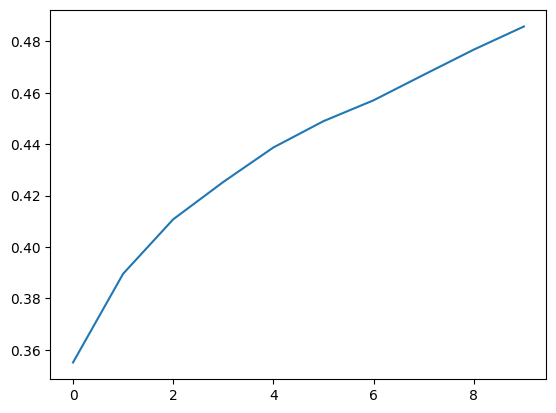

In [42]:
plt.plot(M.history["accuracy"])

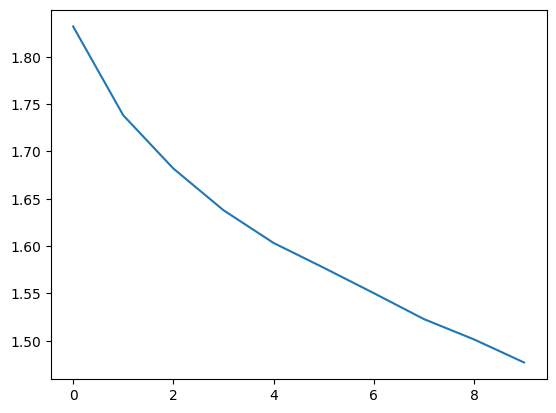

In [43]:
plt.plot(M.history["loss"])

In [44]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

313/313 [==============================] - 3s 9ms/step
actual:  ship
predicted:  ship


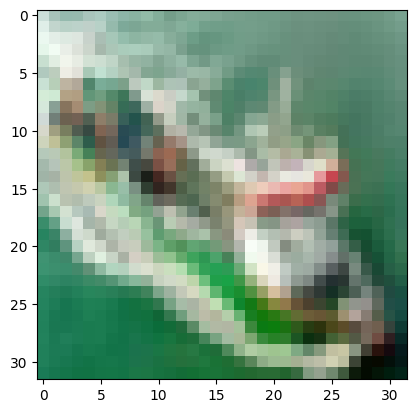

In [59]:
n = 15
plt.imshow(x_test[n].reshape((32,32,3)))

predictions = model.predict(x_test)

print("actual: ", classes[np.argmax(y_test[n])])
print("predicted: ", classes[np.argmax(predictions[n])])